In [1]:
%env AWS_REQUEST_PAYER=requester

env: AWS_REQUEST_PAYER=requester


In [2]:
%matplotlib inline
from PIL import Image

import xarray
import holoviews as hv
import hvplot.xarray

import numpy as np

In [3]:
dswe = 's3://usgs-landsat-level-3/collection02/DSWE/2021/CU/021/010/LC08_CU_021010_20210412_20210504_02_DSWE/LC08_CU_021010_20210412_20210504_02_INTSM.TIF'

In [4]:
wimg = xarray.open_dataset(dswe, engine='rasterio')

In [5]:
wimg.hvplot.image(rasterize=True,  x='x', y='y', width=600, height=500, cmap='tab20',).hist()

:AdjointLayout
   :DynamicMap   [band]
      :Image   [x,y]   (band_data)
   :DynamicMap   [band]
      :Histogram   [band_data]   (band_data_count)

The Interpreted layer with mask applied (INWM) has been split into two bands: Interpreted Layer with Some Masks Applied (INTSM) and Interpreted Layer with All Masks Applied (INWAM).  (See Bands table below)

In [6]:
wimg

<xarray.Dataset>
Dimensions:      (band: 1, x: 5000, y: 5000)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.844e+05 5.845e+05 ... 7.344e+05 7.344e+05
  * y            (y) float64 1.815e+06 1.815e+06 ... 1.665e+06 1.665e+06
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [7]:
ary = wimg['band_data'][0].values

In [8]:
ary.shape

(5000, 5000)

In [9]:
import matplotlib.pyplot as plt


In [10]:
type(ary)

numpy.ndarray

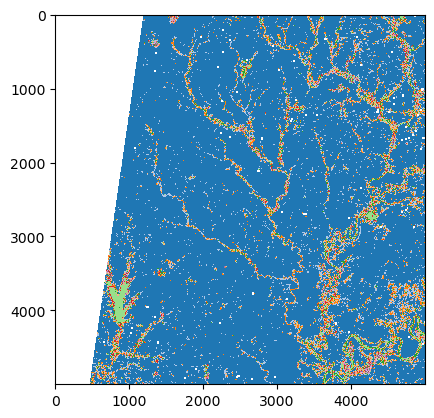

In [11]:
plt.imshow(ary, cmap='tab20')

In [12]:
# Create a 256 by 256 array filled with the value 10
array_10 = np.full((250, 250), 10)

# Print or use the array as needed
print(array_10)

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


In [13]:
ary[:250, :250] = array_10

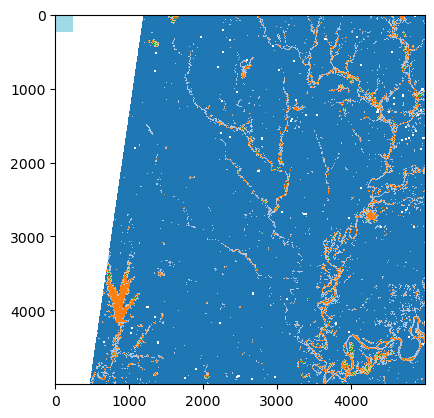

In [14]:
plt.imshow(ary, cmap='tab20')

In [15]:
array_20 = np.full((250, 250), 20)


In [16]:
yoff = 19 * 250
yoff

4750

In [17]:
ary[yoff:yoff+250, 0:250] = array_20

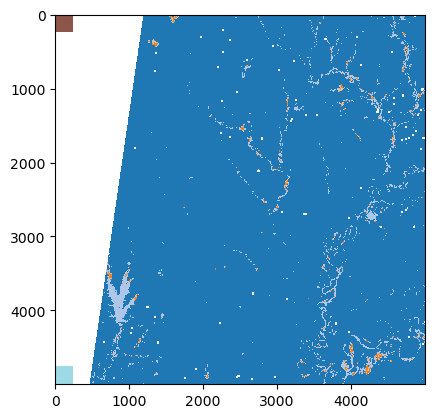

In [18]:
plt.imshow(ary, cmap='tab20')

In [19]:
array_30 = np.full((250, 250), 30)


In [20]:
xoff = 19 * 250
xoff

4750

In [21]:
ary[:250, xoff:xoff+250] = array_30

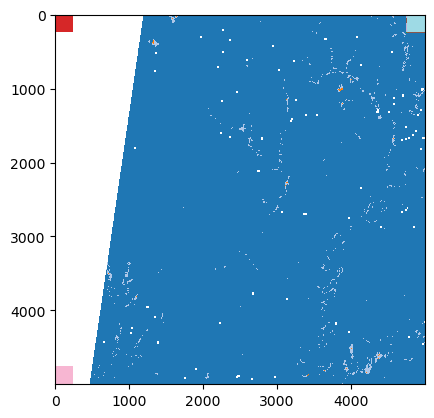

In [22]:
plt.imshow(ary, cmap='tab20')

In [23]:
array_40 = np.full((250, 250), 40)


In [24]:
ary[yoff:yoff+250, xoff:xoff+250] = array_40

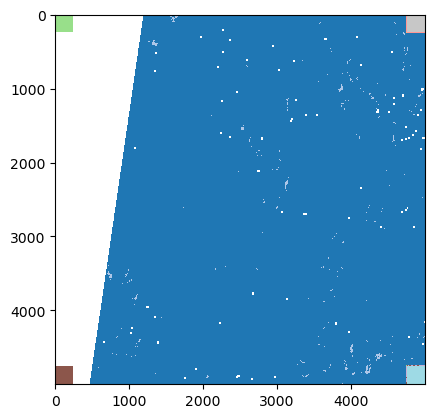

In [25]:
plt.imshow(ary, cmap='tab20')

In [26]:
import numpy as np

# Create a random 250 by 250 array with values between 1 and 10
random_array = np.random.randint(1, 11, size=(250, 250))

# Count the number of elements equal to 1
count_of_ones = np.count_nonzero(random_array == 1)

# Print the count
print(f"Number of elements equal to 1: {count_of_ones}")

Number of elements equal to 1: 6195


# this could be usd to find the subGridcell that has the most definite water

In [27]:
5000/256

19.53125

In [ ]:
grid = np.full((20, 20), 1, dtype=object)
for y in range(0,20):
    yoff = y * 256
    for x in range (0,20):
        xoff = x * 256
        print(y,x)
        grid[y][x] = wimg['band_data'][0].values[yoff:yoff+256, xoff:xoff+256]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10

In [ ]:
grid[0,0].shape

In [ ]:
grid[19,19].shape

In [ ]:
256 * 19 + 136

In [ ]:
def count_ones(ary):
    count_of_ones = np.count_nonzero(ary == 1)
    return count_of_ones